In [1]:
import pandas
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from yellowbrick.text import TSNEVisualizer

In [2]:
DF_FL0 = pandas.read_excel('/Users/alice.naghshineh/Desktop/michael_data/Florida.xlsx')

DF_Dependent = DF_FL0[['Q12PresidentialVote']].copy()

DF_Independent = DF_FL0[[
 'Party',
 'Issue',
 'Hispanic',
 'Race',
 'Marital Status',
 'Education',
 'Age',
 'Gender',
 'Raceparty',
 'Genderparty']]

DF_FL0 = DF_FL0.drop(['Q8Clinton', 'Q9Trump'], axis=1)

In [3]:
DF_FL0.head(10)

,Registered,Plan to Vote,First Time,Party,Q12PresidentialVote,Issue,Motivation,Participation,Hispanic,Race,Marital Status,Education,Age,Gender,Raceparty,Genderparty
0,Yes,Yes,No,Independent,Trump,Economy,Support State,President And Party,Yes,Hispanic,Married,Some College,50 64,Male,Hispanic Independent,Hispanic Male
1,Yes,Yes,No,Republican,Trump,Terrorism,Issue,President And Party,No,White Caucasian,Married,High School Graduate,65 Or Older,Male,White Caucasian Republican,White Caucasian Male
2,Yes,Yes,No,Republican,Trump,Economy,Issue,Different Parties,No,White Caucasian,Married,Bachelors Degree,30 49,Female,White Caucasian Republican,White Caucasian Female
3,Yes,Yes,No,Republican,Clinton,Healthcare,Other,Different Parties,No,African American,Married,Some High School,50 64,Female,African American Republican,African American Female
4,Yes,Yes,No,Democrat,Trump,Terrorism,Support Candidate,President And Party,No,African American,Single,Some College,65 Or Older,Male,African American Democrat,African American Male
5,No,No,No,Democrat,Clinton,Healthcare,Other,Only President,No,White Caucasian,Divorced,Some College,65 Or Older,Male,White Caucasian Democrat,White Caucasian Male
6,Yes,Yes,No,Republican,Trump,Economy,Issue,President And Party,No,Other,Married,High School Graduate,65 Or Older,Female,Other Republican,Other Female
7,Yes,Yes,No,Republican,Trump,Terrorism,Support Candidate,Different Parties,No,White Caucasian,Married,Post Graduate,65 Or Older,Male,White Caucasian Republican,White Caucasian Male
8,Yes,Yes,No,Democrat,Clinton,Terrorism,Support Candidate,President And Party,No,White Caucasian,Married,Bachelors Degree,65 Or Older,Female,White Caucasian Democrat,White Caucasian Female
9,Yes,Yes,No,Republican,Clinton,Education,Other,Different Parties,No,White Caucasian,Married,Bachelors Degree,30 49,Female,White Caucasian Republican,White Caucasian Female


In [4]:
DF_FL0.describe()

,Registered,Plan to Vote,First Time,Party,Q12PresidentialVote,Issue,Motivation,Participation,Hispanic,Race,Marital Status,Education,Age,Gender,Raceparty,Genderparty
count,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
unique,2,2,2,3,5,9,6,4,2,5,3,5,4,2,15,10
top,Yes,Yes,No,Democrat,Clinton,Economy,Support Candidate,Different Parties,No,White Caucasian,Married,Some College,65 Or Older,Female,White Caucasian Republican,White Caucasian Female
freq,592,582,554,265,273,187,267,268,499,393,411,157,291,352,160,244


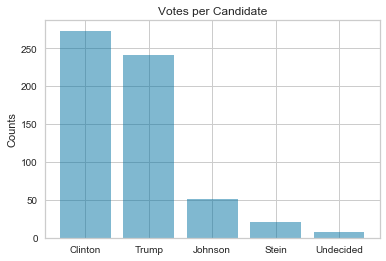

In [ ]:
candidates = ('Clinton', 'Trump', 'Johnson', 'Stein', 'Undecided')
y_pos = np.arange(len(candidates))
counts = DF_FL0['Q12PresidentialVote'].value_counts().tolist()

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, candidates)
plt.ylabel('Counts')
plt.title('Votes per Candidate')

plt.show()

In [ ]:
def get_counts_percent(column):
    c = DF_FL0[column].value_counts()
    p = DF_FL0[column].value_counts(normalize=True)
    t = pandas.concat([c,p], axis=1, keys=['counts', '%'])
    print('\n{}:\n{}'.format(column,t))

In [ ]:
for column in DF_Independent:
    get_counts_percent(column)


Party:
             counts         %
Democrat        265  0.446880
Republican      213  0.359191
Independent     115  0.193929

Issue:
             counts         %
Economy         187  0.315346
Terrorism       139  0.234401
Healthcare       66  0.111298
Other            60  0.101180
Budget           46  0.077572
Social           39  0.065767
Immigration      27  0.045531
Education        19  0.032040
Law              10  0.016863

Hispanic:
     counts         %
No      499  0.841484
Yes      94  0.158516

Race:
                  counts         %
White Caucasian      393  0.662732
Hispanic              94  0.158516
African American      70  0.118044
Other                 30  0.050590
Asian                  6  0.010118

Marital Status:
          counts         %
Married      411  0.693086
Single       125  0.210793
Divorced      57  0.096121

Education:
                      counts         %
Some College             157  0.264755
Bachelors Degree         150  0.252951
Post Graduate   

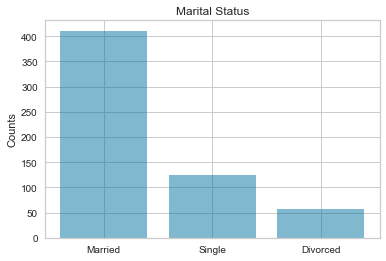

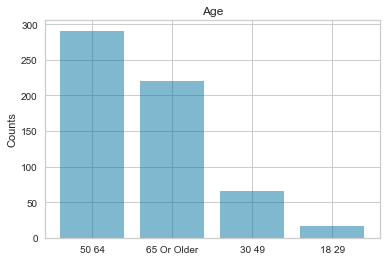

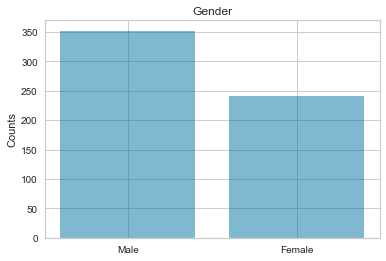

In [ ]:
for column in ['Marital Status','Age','Gender']:
    categories = DF_FL0[column].unique().tolist()
    y_pos = np.arange(len(categories))
    counts = DF_FL0[column].value_counts().tolist()

    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Counts')
    plt.title('{}'.format(column))

    plt.show()

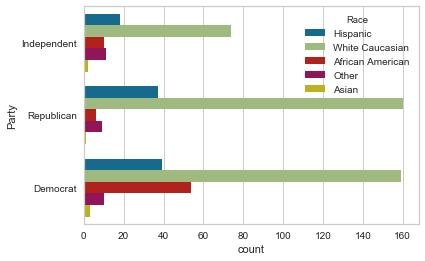

In [ ]:
ax = sns.countplot(y='Party', hue='Race', data=DF_FL0)

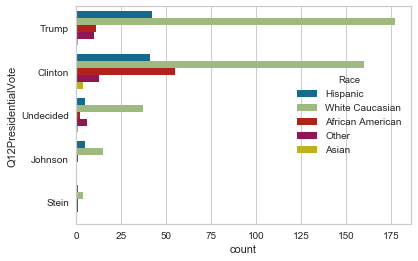

In [ ]:
ax = sns.countplot(y='Q12PresidentialVote', hue='Race', data=DF_FL0)

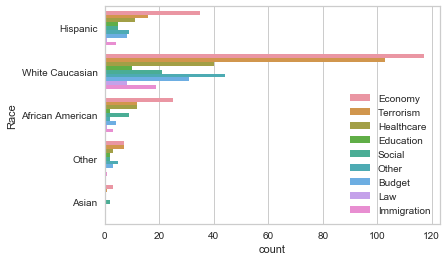

In [ ]:
ax = sns.countplot(y='Race', hue='Issue', data=DF_FL0)
plt.legend(loc='lower right');

In [ ]:
DF_Independent_dummies = pandas.get_dummies(DF_Independent)

le = preprocessing.LabelEncoder()

le.fit(DF_Dependent['Q12PresidentialVote'])

target = le.transform(DF_Dependent['Q12PresidentialVote'])

In [ ]:
[x_train, x_test, y_train, y_test] = train_test_split(DF_Independent_dummies, target, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(DF_Independent_dummies, target) 
  
# accuracy on X_test 
accuracyknn = knn.score(DF_Independent_dummies, target) 
print(accuracyknn) 

0.9190556492411467


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train)
predicted = knn.predict(x_test)
print("{}: {}".format(knn.__class__.__name__, f1_score(y_test, predicted, average='micro')))

KNeighborsClassifier: 0.6050420168067226


In [ ]:
tsne = TSNEVisualizer(size=(1080, 720))
tsne.fit(DF_Independent_dummies, target)

print(tsne.poof())